In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

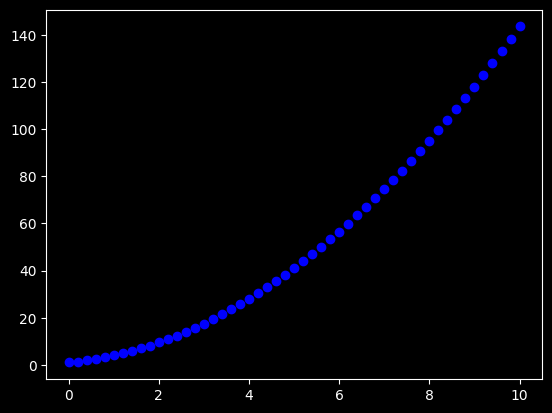

In [3]:
data = pd.read_csv('locally_weighted_regression.csv')
plt.scatter(data['x'], data['y'], color='blue', label='Data Points')
plt.show()

In [4]:
X = np.array(data.x)
Y = np.array(data.y)

In [5]:
def Weights(query_point, tau):
    m = data.x.shape[0]
    w = np.zeros((m))
    for i in range(m):
        w[i] = np.exp(-((data.x[i] - query_point) ** 2) / (2 * tau ** 2))
    return np.array(np.diag(w))


In [6]:
def ParameterVector(query_point, tau):
    W = Weights(query_point, tau)
    ones = np.ones(X.shape[0])
    X_design = np.column_stack((X, ones))

    XT = X_design.T
    XTWX = XT @ W @ X_design
    XTWX_inv = np.linalg.pinv(XTWX)

    theta = XTWX_inv @ XT @ W @ Y
    return theta

In [7]:
def LocallyWeightedRegression(x0, tau):
    theta = ParameterVector(x0, tau)
    return theta[0] * x0 + theta[1]

In [8]:
tau = 0.5
y_pred = np.array([LocallyWeightedRegression(x0, tau) for x0 in X])

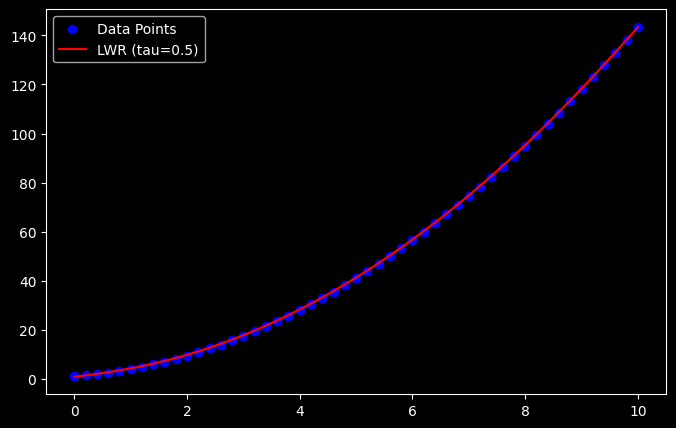

In [9]:
plt.figure(figsize=(8,5))
plt.scatter(X, Y, color='blue', label='Data Points')
plt.plot(X, y_pred, color='red', label=f'LWR (tau={tau})')
plt.legend()
plt.show()
